In [7]:
import pandas as pd 
import numpy as np 
import io 


In [21]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
df= pd.read_excel(URL,
                sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [23]:
print(df.shape)

(195, 43)


In [24]:
df.dtypes

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

In [26]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [28]:
df.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [30]:
all(isinstance(column, str) for column in df.columns)

False

In [33]:
df.columns=list(map(str,df.columns) )

In [34]:
all(isinstance(column, str) for column in df.columns)

True

In [35]:
df.set_index('Country',inplace=True)

In [36]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [49]:
df['Total']=df.sum(axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [50]:
df.shape

(195, 38)

In [51]:
years=list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [52]:
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.2.2


In [53]:
df.sort_values(['Total'],ascending=False,axis=0,inplace=True)
df_top5=df.head()
df_top5=df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


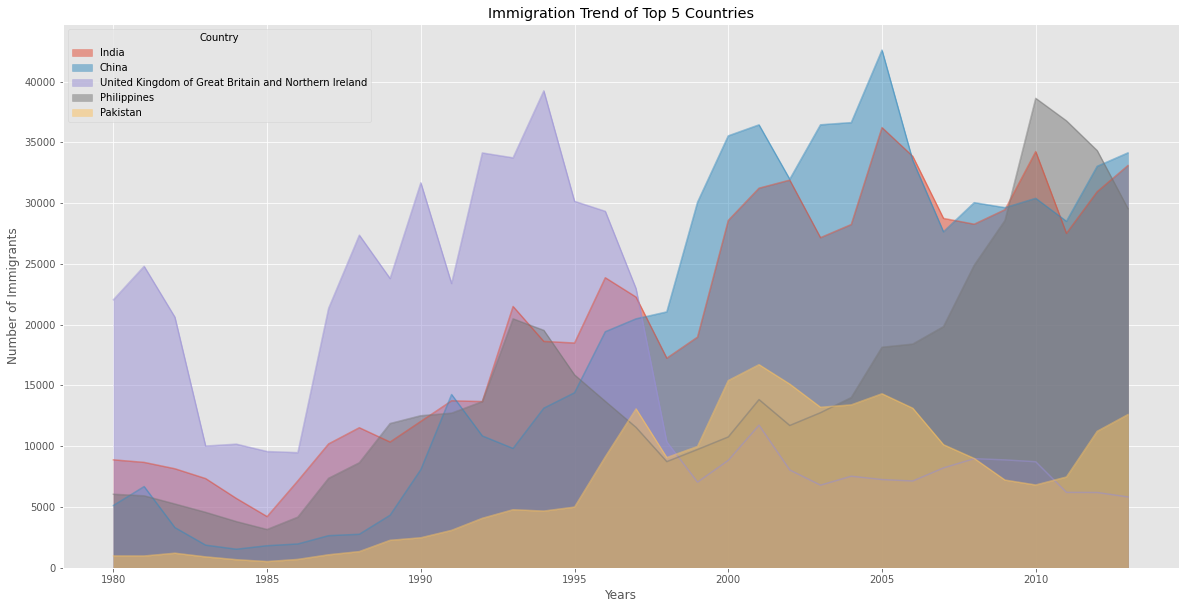

In [55]:
df_top5.index=df_top5.index.map(int)
df_top5.plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

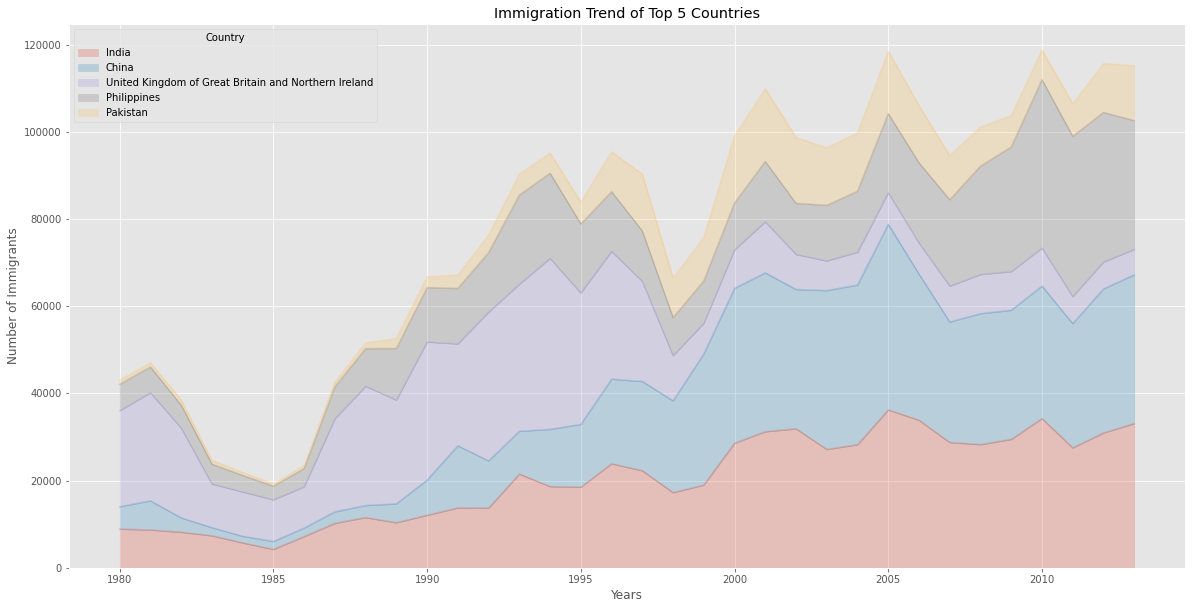

In [56]:


df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=True,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

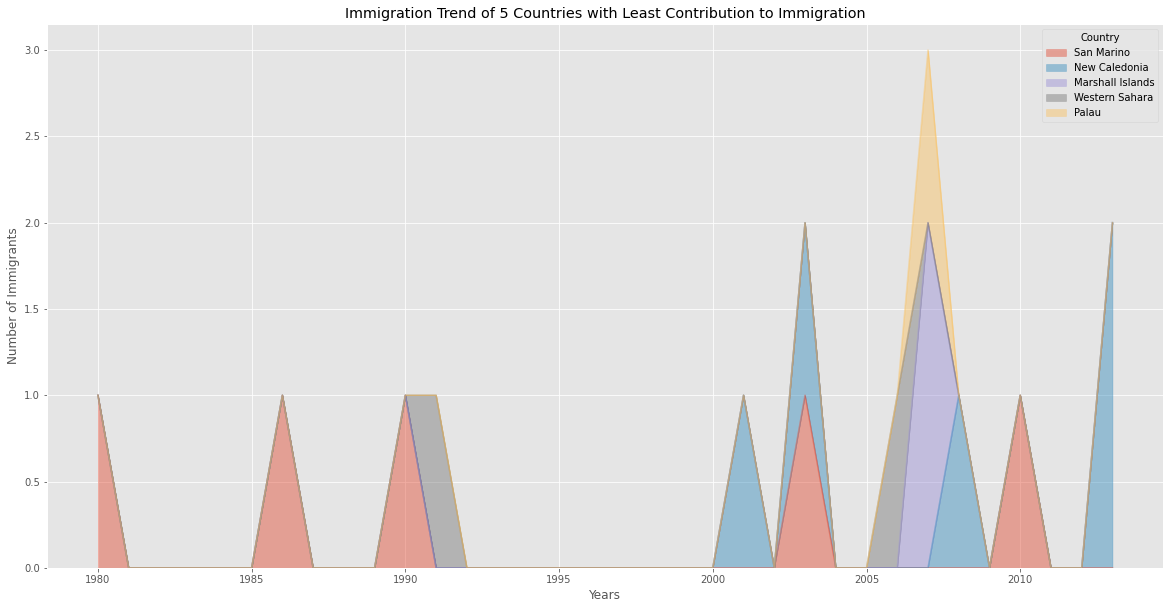

In [59]:
df_least_5=df.tail(5)
df_least_5=df_least_5[years].transpose()
df_least_5.index=df_least_5.index.map(int)
df_least_5.head()
df_least_5.plot(kind='area',alpha=0.45,figsize=(20,10))
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [60]:
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [61]:
count,bin_edges=np.histogram(df['2013'])

In [62]:
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


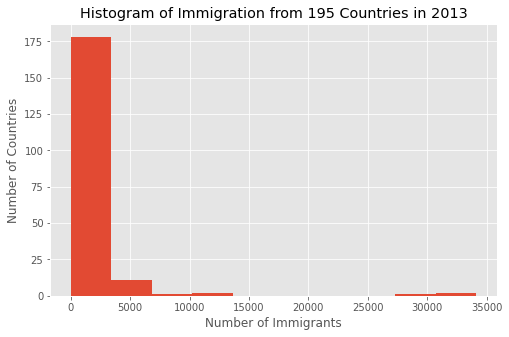

In [63]:
df['2013'].plot(kind='hist',figsize=(8,5))
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

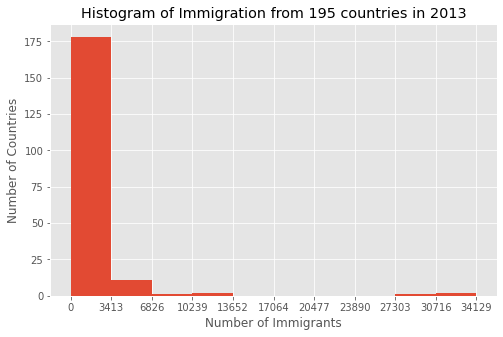

In [66]:
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [67]:
df_iceland=df.loc['Iceland',years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

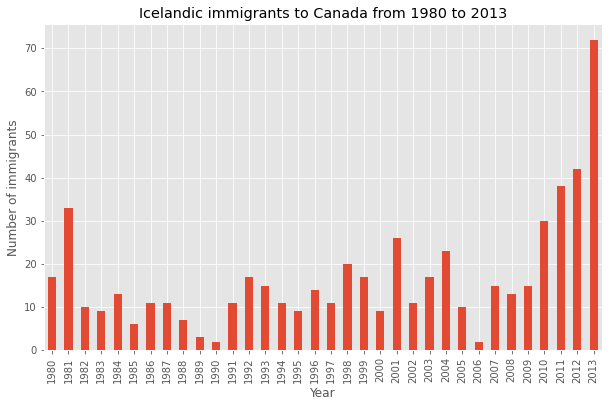

In [68]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

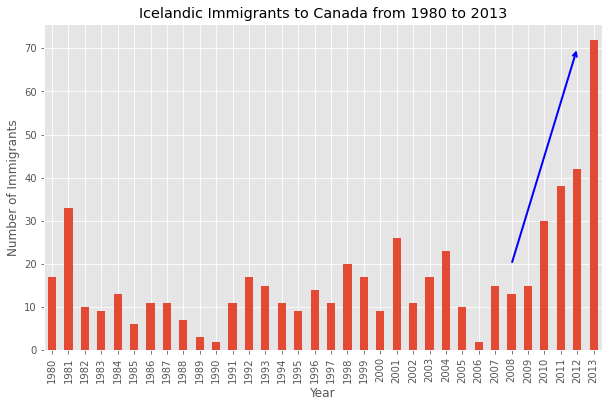

In [69]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()